<a href="https://colab.research.google.com/github/MariaOros/Hackathon2024-baseball/blob/main/Question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the new exit velocity data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
import numpy as np
import statistics
from scipy.stats import ttest_ind

exit_velocity =pd.read_csv('/content/exit_velocity.csv')
exit_velocity

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,"last_name, first_name",player_id,attempts,avg_hit_angle,anglesweetspotpercent,max_hit_speed,avg_hit_speed,ev50,fbld,gb,max_distance,avg_distance,avg_hr_distance,ev95plus,ev95percent,barrels,brl_percent,brl_pa
0,"Arraez, Luis",650333,334,12.2,43.7,108.4,86.6,95.1,89.6,84.2,379,158,364.0,82,24.6,6,1.8,1.6
1,"Semien, Marcus",543760,292,16.7,34.2,112.1,87.4,97.8,91.6,83.1,412,178,384.0,102,34.9,19,6.5,5.1
2,"Garcia, Maikel",672580,288,7.8,32.3,108.6,91.0,100.5,93.0,90.5,422,146,401.0,126,43.8,13,4.5,3.5
3,"Díaz, Yandy",650490,284,3.7,28.2,114.0,92.5,103.3,94.3,92.2,439,132,393.0,140,49.3,17,6.0,4.6
4,"Witt Jr., Bobby",677951,284,14.5,35.2,116.9,92.5,103.8,94.8,91.1,468,185,423.0,139,48.9,41,14.4,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,"Brown, Seth",664913,114,18.5,36.8,110.9,87.6,98.8,92.8,83.2,445,176,406.0,39,34.2,9,7.9,4.6
250,"Naylor, Bo",666310,113,21.8,35.4,107.2,88.5,98.5,92.2,86.2,435,181,407.0,40,35.4,7,6.2,3.6
251,"Bauers, Jake",641343,110,23.3,43.6,110.1,89.9,100.4,93.2,84.5,444,201,404.0,49,44.5,12,10.9,6.1
252,"Taylor, Michael A.",572191,104,13.2,28.8,111.3,88.9,99.9,93.4,85.1,406,158,349.0,39,37.5,8,7.7,4.5


In [ ]:
pitchers = pd.read_csv("'/content/exit_velocity.csv'")

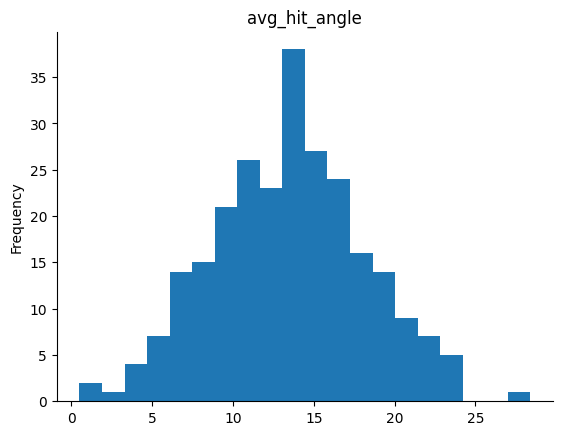

In [ ]:
# @title avg_hit_angle

from matplotlib import pyplot as plt
exit_velocity['avg_hit_angle'].plot(kind='hist', bins=20, title='avg_hit_angle')
plt.gca().spines[['top', 'right',]].set_visible(False)

Compare Average distance and Average hit speed and avg_hit_angle

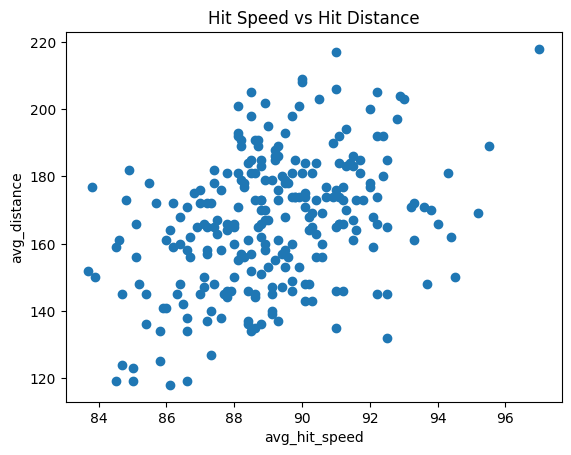

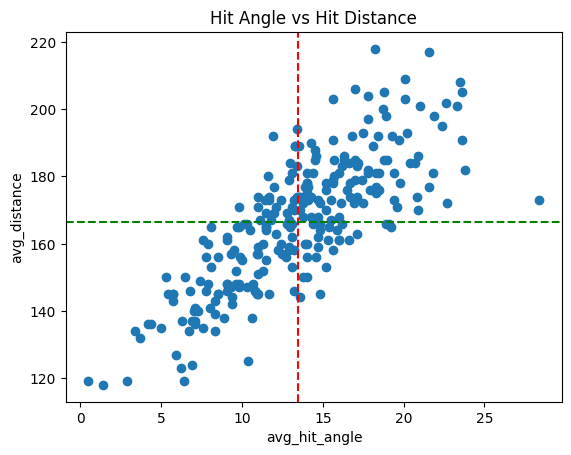

13.445669291338582 166.50787401574803


In [ ]:
#variables
avg_hit_speed = exit_velocity['avg_hit_speed']
avg_hit_angle = exit_velocity['avg_hit_angle']
avg_distance = exit_velocity['avg_distance']
# Create the scatter plot
plt.scatter(avg_hit_speed, avg_distance)

# Add labels and title
plt.xlabel('avg_hit_speed')
plt.ylabel('avg_distance')
plt.title('Hit Speed vs Hit Distance')

# Show the plot
plt.show()
# Create the scatter plot
plt.scatter(avg_hit_angle, avg_distance)

# Add labels and title
plt.xlabel('avg_hit_angle')
plt.ylabel('avg_distance')
plt.title('Hit Angle vs Hit Distance')

mean_x = np.mean(avg_hit_angle)
mean_y = np.mean(avg_distance)

# Plot median lines
plt.axvline(mean_x, color='r', linestyle='--', label=f'Median X = {mean_x:.2f}')
plt.axhline(mean_y, color='g', linestyle='--', label=f'Median Y = {mean_y:.2f}')

# Show the plot
plt.show()
print(mean_x, mean_y)

Linear Regression Model to predict the Average distance of ba

BELOW: Prediction of homerun distance based on fbld values using Random Forest Regression. R² is the proportion of variance “explained” or “accounted for” by the model.


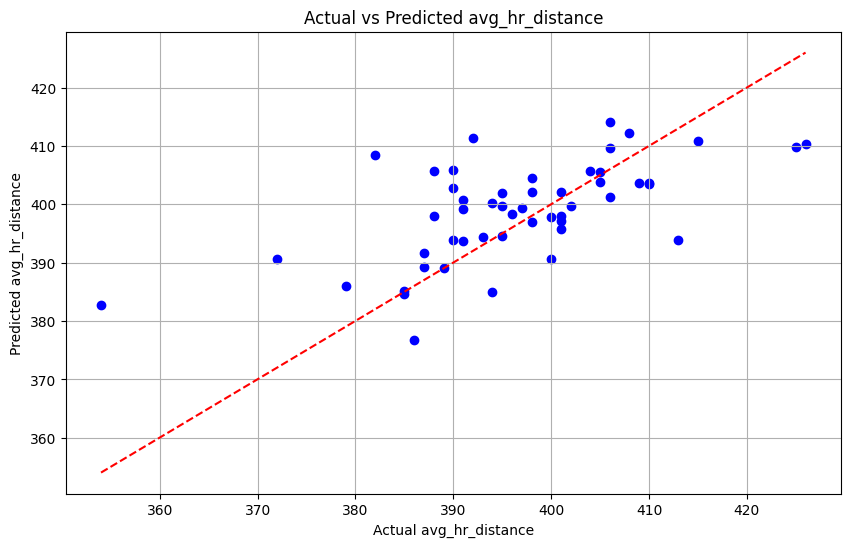

Mean Squared Error (MSE): 96.55213921568625
R-squared (R2) Score: 0.3445490100327815
Selected Features: Index(['attempts', 'player_id', 'ev50', 'avg_distance', 'max_distance'], dtype='object')


In [ ]:
# Initialize variables
x = exit_velocity[["fbld", "attempts", "avg_hit_angle", "anglesweetspotpercent", "player_id", "ev50", "ev95plus", "avg_distance", "max_distance",
                   "max_hit_speed", "avg_hit_speed", "gb", "ev95percent", "barrels", "brl_percent",	"brl_pa"]]
hr_distance = exit_velocity["avg_hr_distance"]

valid_rows = ~np.isnan(hr_distance)
x_filtered = x[valid_rows]
hr_distance_filtered = hr_distance[valid_rows]

# Split filtered data into training and testing sets
x_train, x_test, hr_dist_train, hr_dist_test = train_test_split(x_filtered, hr_distance_filtered, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Initialize Recursive Feature Elimination (RFE) with Random Forest model
rfe = RFE(estimator=rf_model, n_features_to_select=5, step=1)  # Select top 5 features
rfe.fit(x_train, hr_dist_train)

# Get selected feature indices
selected_features = rfe.get_support(indices=True)

# Filter x_train and x_test to keep only selected features
x_train_rfe = x_train.iloc[:, selected_features]
x_test_rfe = x_test.iloc[:, selected_features]

# Fit the model with selected features
rf_model.fit(x_train_rfe, hr_dist_train)

# Make predictions on the test set
hr_dist_prediction = rf_model.predict(x_test_rfe)

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(hr_dist_test, hr_dist_prediction, color='blue')
plt.plot([hr_dist_test.min(), hr_dist_test.max()], [hr_dist_test.min(), hr_dist_test.max()], linestyle='--', color='red')
plt.xlabel('Actual avg_hr_distance')
plt.ylabel('Predicted avg_hr_distance')
plt.title('Actual vs Predicted avg_hr_distance')
plt.grid(True)
plt.show()

# Calculate metrics
mse = mean_squared_error(hr_dist_test, hr_dist_prediction)
r2 = r2_score(hr_dist_test, hr_dist_prediction)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

# Print selected features
selected_feature_names = x.columns[selected_features]
print("Selected Features:", selected_feature_names)

Guiding Question: Are there statistical differences between a "strong" and "weak"
Null Hypothesis (H0): There is no significant difference in average HR distance between swings classified as strong and weak based on average distance.

Alternative Hypothesis (H1): There is a significant difference in average HR distance between swings classified as strong and weak based on average distance.


In [ ]:
#define a threshold for a "strong" distance (over or under the mean average distance)
exit_velocity_threshold = exit_velocity["avg_distance"].mean()

#function to classify swing strengh
def classify_swing_strength(avg_distance, threshold):
    if avg_distance >= threshold:
        return 'strong'
    else:
        return 'weak'

exit_velocity['swing_strength'] = exit_velocity['avg_distance'].apply(lambda x: classify_swing_strength(x, exit_velocity_threshold))

# Remove NA values
data = exit_velocity[['avg_hr_distance', 'swing_strength']]
data = data.dropna()

# Separate avg_hr_distance based on swing_strength
strong_swings = data[data['swing_strength'] == 'strong']['avg_hr_distance']
weak_swings = data[data['swing_strength'] == 'weak']['avg_hr_distance']

#t-test
t_statistic, p_value = ttest_ind(strong_swings, weak_swings)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in average HR distance between strong and weak swings based on average distance.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in average HR distance between strong and weak swings based on average distance.")

#mean and effect size
mean_strong = np.mean(strong_swings)
mean_weak = np.mean(weak_swings)
effect_size = (mean_strong - mean_weak) / np.sqrt((np.std(strong_swings)**2 + np.std(weak_swings)**2) / 2)

print(f"Mean Avg HR Distance (Strong): {mean_strong}")
print(f"Mean Avg HR Distance (Weak): {mean_weak}")
print(f"Cohen's d Effect Size: {effect_size}")


T-Statistic: 2.388864890503005
P-Value: 0.017642893300141075
Reject Null Hypothesis: There is a significant difference in average HR distance between strong and weak swings based on average distance.
Mean Avg HR Distance (Strong): 397.2248062015504
Mean Avg HR Distance (Weak): 393.3739837398374
Cohen's d Effect Size: 0.30170002215940933


In [ ]:
statistics.mean(exit_velocity["avg_distance"])

166.50787401574803